<h1>Exploratory Data Analysis of toxic data

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

train = pd.read_csv("train.csv")
train.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [85]:
# Number of labelled comments
len(train)

159571

In [86]:
#Checking for empty records
train.isnull().any()

id               False
comment_text     False
toxic            False
severe_toxic     False
obscene          False
threat           False
insult           False
identity_hate    False
dtype: bool

In [87]:
list_classes = ["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]
list_sentences_train = train["comment_text"]

        category  number_of_comments
0          toxic               15294
1   severe_toxic                1595
2        obscene                8449
3         threat                 478
4         insult                7877
5  identity_hate                1405


Text(0.5,0,'category')

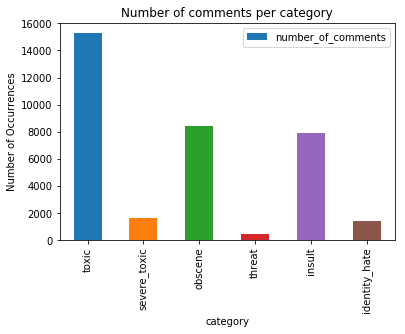

In [88]:
df_tox = train.drop(['id', 'comment_text'], axis=1)
counts = []
categories = list(df_tox.columns.values)
for i in categories:
    counts.append((i, df_tox[i].sum()))

df_stat = pd.DataFrame(counts, columns=['category', 'number_of_comments'])
print(df_stat)


df_stat.plot(x='category', y='number_of_comments', kind='bar')
plt.title("Number of comments per category")
plt.ylabel('Number of Occurrences')
plt.xlabel('category')

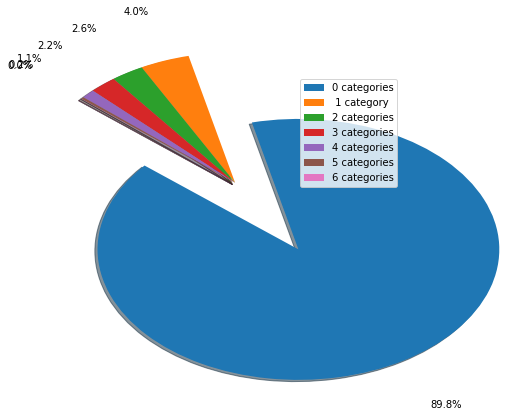

In [89]:
rowsums = train.iloc[:,2:].sum(axis=1)
x=rowsums.value_counts()

labels=x.index
percent=x.values

explode = (0.9, 0, 0, 0,0,0,0) 

plt.pie(percent,explode=explode,
autopct='%1.1f%%', shadow=True,pctdistance=1.4, labeldistance=1.9, startangle=140,radius=1.5)
plt.legend(labels=['0 categories',' 1 category','2 categories','3 categories','4 categories','5 categories','6 categories'])

plt.show()

In [90]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

max_features = 20000
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(list(list_sentences_train))
list_tokenized_train = tokenizer.texts_to_sequences(list_sentences_train)


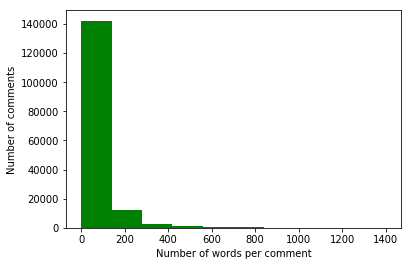

In [91]:
totalNumWords = [len(one_comment) for one_comment in list_tokenized_train]

plt.hist(totalNumWords,color='green')
plt.xlabel('Number of words per comment')
plt.ylabel('Number of comments')
plt.show()

In [92]:
temp_df=train.iloc[:,2:]

#Correlation between the toxic label and the other labels
main_col="toxic"
corr_mats=[]
for other_col in temp_df.columns[1:]:
    confusion_matrix = pd.crosstab(temp_df[main_col], temp_df[other_col])
    corr_mats.append(confusion_matrix)
out = pd.concat(corr_mats,axis=1,keys=temp_df.columns[1:])

out

severe_toxic       obscene        threat       insult        \
severe_toxic            0     1       0     1       0    1       0     1   
toxic                                                                      
0                  144277     0  143754   523  144248   29  143744   533   
1                   13699  1595    7368  7926   14845  449    7950  7344   

             identity_hate        
severe_toxic             0     1  
toxic                             
0                   144174   103  
1                    13992  1302